<h1 style="text-align:center;">PROJECT-2</h1>
<h1 style="text-align:center;">NAME: MUHAMMAD DAWOOD</h1>

<h1 style="text-align:center;">----------------------------------------------------------------------------------</h1>

<h1 style="text-align:center;">Importing Libraries</h1>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align:center;">Step 1: Loading the Data</h2>

In [15]:
data = pd.read_csv("StudentsPerformance.csv")

<h3 style="text-align:center;">Overview of the dataset</h3>

In [25]:
data.info()
print("------------------------------------------------------")
print("------------------------------------------------------")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
------------------------------------------------------
------------------------------------------------------


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h2 style="text-align:center;">Step 2: Data Cleaning</h2>
<h3 style="text-align:center;">1)Handle missing values (if any) and drop irrelevant columns</h3>
<h3 style="text-align:center;">2)Convert categorical columns to numerical using one-hot encoding</h3>
<h3 style="text-align:center;">3)Check for missing values</h3>

In [31]:
data_cleaned = data.dropna()

In [33]:
data_encoded = pd.get_dummies(data_cleaned, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

In [35]:
print(data_encoded.isnull().sum())

math score                                       0
reading score                                    0
writing score                                    0
gender_male                                      0
race/ethnicity_group B                           0
race/ethnicity_group C                           0
race/ethnicity_group D                           0
race/ethnicity_group E                           0
parental level of education_bachelor's degree    0
parental level of education_high school          0
parental level of education_master's degree      0
parental level of education_some college         0
parental level of education_some high school     0
lunch_standard                                   0
test preparation course_none                     0
dtype: int64


<h1 style="text-align:center;">Step 3: Exploratory Data Analysis (EDA)</h1>

In [38]:
sns.set(style='whitegrid')

<h3 style="text-align:center;">Histogram of Math Scores</h3>

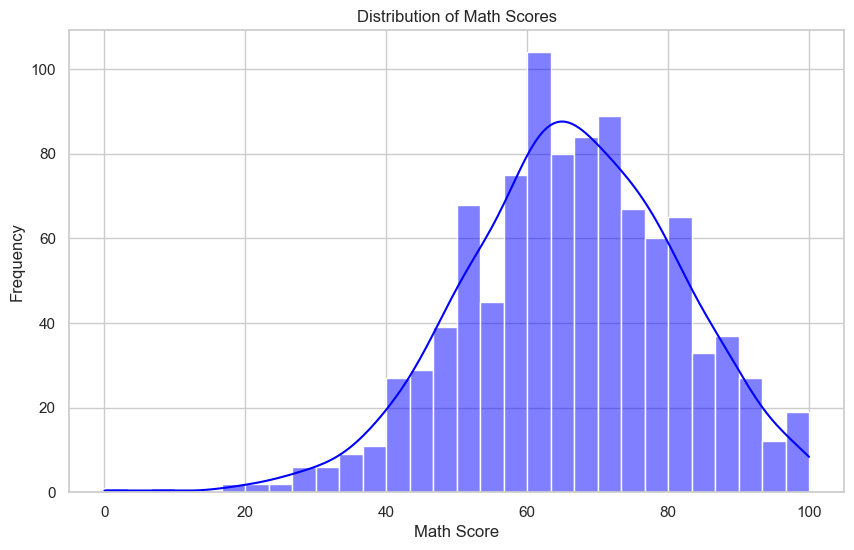

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['math score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

<h2 style="text-align:center;">Bar plot of Parental Education vs Math Scores</h2>

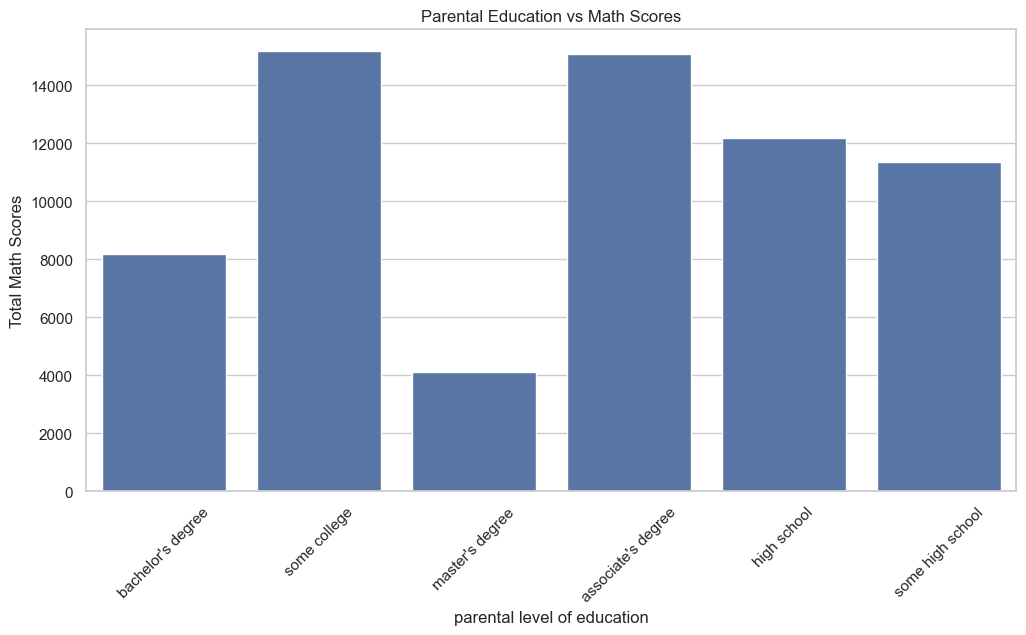

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='parental level of education', y='math score', data=data_cleaned, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Parental Education vs Math Scores')
plt.ylabel('Total Math Scores')
plt.show()


<h2 style="text-align:center;">Correlation heatmap</h2>

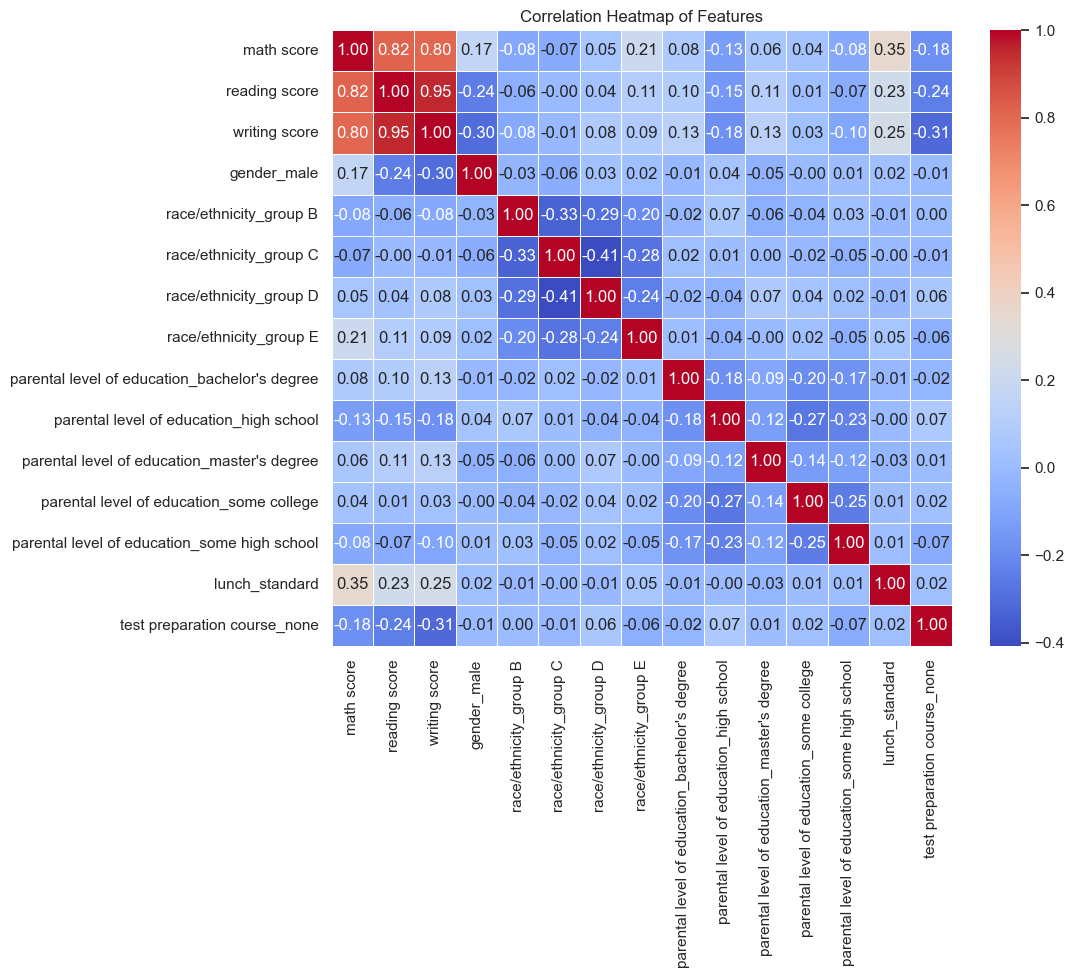

In [61]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

<h1 style="text-align:center;">Step 4: Feature Engineering</h1>
<h3 style="text-align:center;">Creating a new total score feature (sum of math, reading, and writing scores)</h3>

In [65]:
data_encoded['TotalScore'] = data_encoded['math score'] + data_encoded['reading score'] + data_encoded['writing score']

In [67]:
data_encoded['Pass'] = data_encoded['math score'].apply(lambda x: 1 if x >= 60 else 0)


<h1 style="text-align:center;">Step 5: Splitting the Data</h1>

In [72]:
from sklearn.model_selection import train_test_split

<h2 style="text-align:center;">For Regression</h2>

In [75]:
X_regression = data_encoded.drop(columns=['math score'])
y_regression = data_encoded['math score']

In [77]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

<h1 style="text-align:center;">Step 6: Applying a Machine Learning Models</h1>

<h1 style="text-align:center;">Regression-Model</h1>

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
model_regression = LinearRegression()

<h3 style="text-align:center;">Fitting To Model</h3>

In [89]:
model_regression.fit(X_train_reg, y_train_reg)

LinearRegression()

In [91]:
y_pred_reg = model_regression.predict(X_test_reg)

<h3 style="text-align:center;">Training accuracy of  Regression Model</h3>

In [104]:
model_regression.score(X_train_reg,y_train_reg)*100

100.0

<h3 style="text-align:center;">Testing accuracy of  Regression Model</h3>

In [108]:
model_regression.score(X_test_reg,y_test_reg)*100

100.0

<h1 style="text-align:center;">Step 7: Model Evaluation OF Regression Model</h1>

In [112]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [114]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mse ** 0.5
r2 = r2_score(y_test_reg, y_pred_reg)

In [116]:
print(f'Regression - Mean Squared Error: {mse}')
print(f'Regression - Root Mean Squared Error: {rmse}')
print(f'Regression - R-squared: {r2}')

Regression - Mean Squared Error: 4.371488483500342e-27
Regression - Root Mean Squared Error: 6.611723287842847e-14
Regression - R-squared: 1.0


<h1 style="text-align:center;">-------------------------------------------------------------------------------</h1>

<h1 style="text-align:center;">For Classification</h1>

In [123]:
X_classification = data_encoded.drop(columns=['Pass'])
y_classification = data_encoded['Pass']

<h3 style="text-align:center;">Split for classification</h3>

In [126]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestClassifier

<h1 style="text-align:center;">RandomForestClassifier</h1>

In [131]:
model_classification = RandomForestClassifier()

In [133]:
model_classification.fit(X_train_clf, y_train_clf)

RandomForestClassifier()

In [135]:
y_pred_clf = model_classification.predict(X_test_clf)

<h1 style="text-align:center;">Classification evaluation</h1>

In [145]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
class_report = classification_report(y_test_clf, y_pred_clf)

print(f'Classification - Accuracy: {accuracy}')
print("---------------------------------------------------------")
print(f'Classification Report: \n{class_report}')
print("---------------------------------------------------------")

Classification - Accuracy: 1.0
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       130

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

---------------------------------------------------------


<h1 style="text-align:center;">Confusion Matrix</h1>

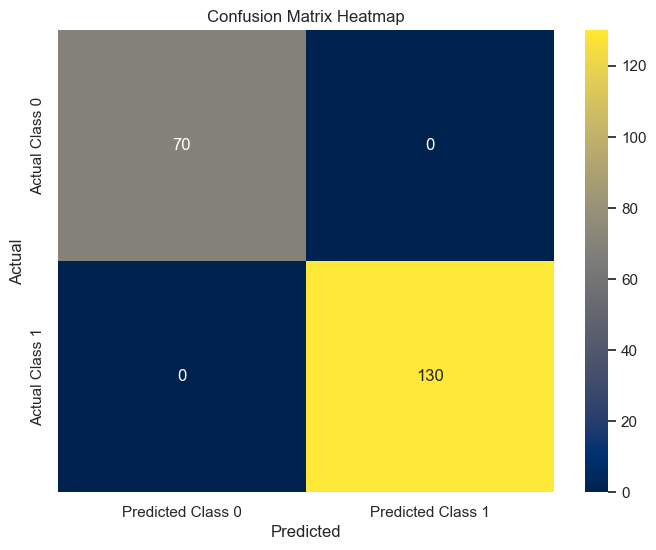

In [152]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=True,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')


plt.show()

<h1 style="text-align:center;">NA DAWOOD</h1>